# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load the dataset

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# EDA - Exploratory Data Analysis

## Target Variable (Response)

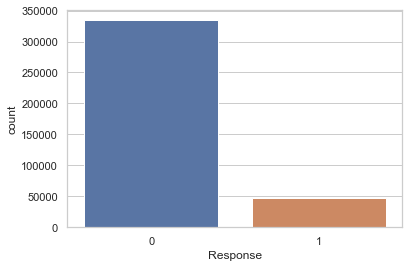

In [4]:
sns.countplot(train.Response)

In [5]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Age Distribution of Customers

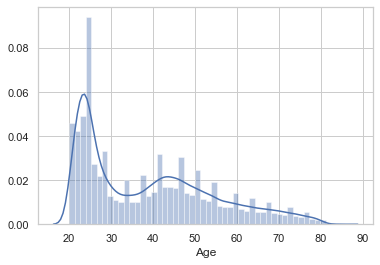

In [6]:
sns.distplot(train.Age)

## Age Vs Annual premium

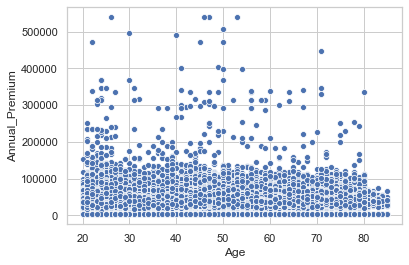

In [7]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

## Gender and Response

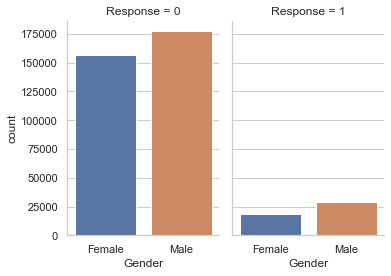

In [8]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Driving license by Gender

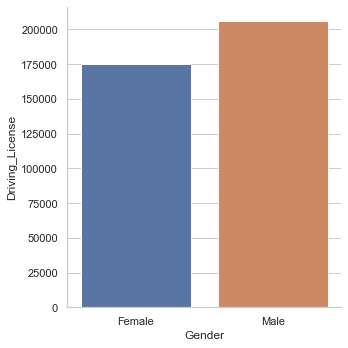

In [9]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

## Customers having Vehicle insurance already

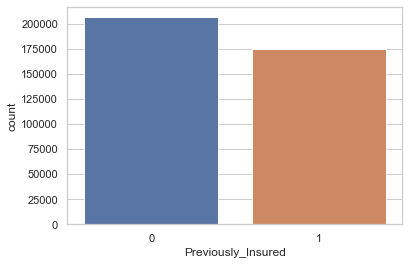

In [10]:
sns.countplot(train.Previously_Insured)

## Response and Vehicle age

In [11]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


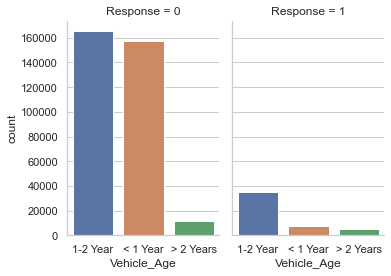

In [12]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Damage Vehicle and Response

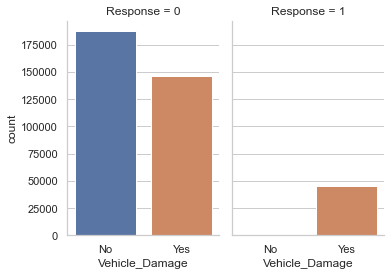

In [13]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Annual Premium Distribution

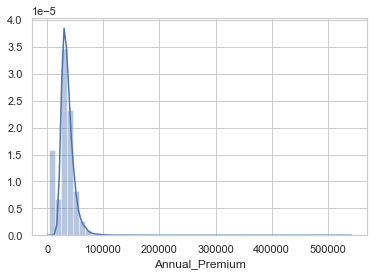

In [14]:
sns.distplot(train.Annual_Premium)

## Vintage
Number of Days, Customer has been associated with the company

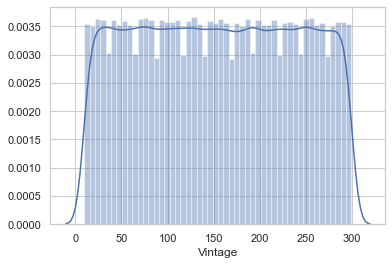

In [15]:
sns.distplot(train.Vintage)

# Drop unecessary columns

In [16]:
train.drop("id", axis = 1, inplace = True)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Data pre-processing
### Check for unique values in the categorical columns

In [17]:
for column in train.select_dtypes(include='object').columns:
    print(column)
    
    print(train[column].unique())

Gender
['Male' 'Female']
Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage
['Yes' 'No']


# Encoding 

In [18]:
dict_gen = {'Male':0,                           #replacing the string with values
         'Female':1}
train['Gender'].replace(dict_gen,inplace=True)

In [19]:
dict_gen = {'> 2 Years':2,                           #replacing the string with values
         '1-2 Year':1,
           '< 1 Year':0}
train['Vehicle_Age'].replace(dict_gen,inplace=True)

In [20]:
dict_gen = {'No':0,                           #replacing the string with values
         'Yes':1}
train['Vehicle_Damage'].replace(dict_gen,inplace=True)

# Encoded dataset

In [21]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,0,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,0,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,0,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,1,68,1,14.0,0,2,1,44617.0,124.0,74,0


# Separation of independent and dependent variables

Dependent variables

In [22]:
x = train.iloc[:, :9].values
x

array([[0.0000e+00, 4.4000e+01, 1.0000e+00, ..., 1.0000e+00, 4.0454e+04,
        2.6000e+01],
       [0.0000e+00, 7.6000e+01, 1.0000e+00, ..., 0.0000e+00, 3.3536e+04,
        2.6000e+01],
       [0.0000e+00, 4.7000e+01, 1.0000e+00, ..., 1.0000e+00, 3.8294e+04,
        2.6000e+01],
       ...,
       [0.0000e+00, 2.1000e+01, 1.0000e+00, ..., 0.0000e+00, 3.5118e+04,
        1.6000e+02],
       [1.0000e+00, 6.8000e+01, 1.0000e+00, ..., 1.0000e+00, 4.4617e+04,
        1.2400e+02],
       [0.0000e+00, 4.6000e+01, 1.0000e+00, ..., 0.0000e+00, 4.1777e+04,
        2.6000e+01]])

Independent/Target variable

In [23]:
y = train.iloc[:, -1].values
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

# Normalization using Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.92154476,  0.33377727,  0.04620794, ...,  0.99029399,
         0.57453868, -1.58723371],
       [-0.92154476,  2.39675074,  0.04620794, ..., -1.00980114,
         0.17263624, -1.58723371],
       [-0.92154476,  0.52718104,  0.04620794, ...,  0.99029399,
         0.4490531 , -1.58723371],
       ...,
       [-0.92154476, -1.14898491,  0.04620794, ..., -1.00980114,
         0.26454281,  0.88491205],
       [ 1.08513449,  1.88100737,  0.04620794, ...,  0.99029399,
         0.81638891,  0.22075349],
       [-0.92154476,  0.46271311,  0.04620794, ..., -1.00980114,
         0.6513986 , -1.58723371]])

# Train-Test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  #random_state with randomly select 20% for testing and 80% for training.

In [26]:
x_train.shape

(304887, 9)

In [27]:
y_train.shape

(304887,)

In [28]:
x_test.shape

(76222, 9)

In [29]:
y_test.shape

(76222,)

# K-nearest neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)

In [31]:
knn.fit(x_train, y_train)   #fit the model with the training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred = knn.predict(x_test)       #get the prediction
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)                   #accuracy of the model built

0.8551730471517409

In [34]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))             #accuracy of the classification

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66846
           1       0.34      0.18      0.24      9376

    accuracy                           0.86     76222
   macro avg       0.61      0.57      0.58     76222
weighted avg       0.82      0.86      0.84     76222

